<a href="https://colab.research.google.com/github/SiatkowskiKamil/My-first-REST-API-project/blob/master/Projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projekt końcowy**
---

**Opis projektu**:

Jako analityk danych w firmie e-commerce, Twoim zadaniem jest przeanalizowanie danych sprzedaży za ostatni rok.

Celem jest zidentyfikowanie trendów, najlepszych produktów, sezonowości oraz przygotowanie rekomendacji dla zespołu marketingowego na kolejny rok.

**Kroki do wykonania:**

1. Wczytaj dane z pliku CSV (dodany w zasobach lekcji)

Plik `sales_data.csv` zawiera następujące kolumny:

`order_id` – unikalny identyfikator zamówienia

`product_id` – unikalny identyfikator produktu

`product_name` – nazwa produktu

`category` – kategoria produktu

`price` – cena jednostkowa produktu

`quantity` – liczba sztuk sprzedanych w zamówieniu

`order_date` – data złożenia zamówienia

`customer_id` – unikalny identyfikator klienta

`customer_location` – lokalizacja klienta

2. Wstępna analiza danych:

Sprawdź, czy w danych występują brakujące wartości lub duplikaty. Jeśli tak, odpowiednio je obsłuż.

Zmień typ kolumny order_date na typ daty.

Wyświetl podstawowe statystyki za pomocą funkcji `describe`().

3. Przekształcanie danych:

Dodaj kolumnę `total_sales`, która będzie iloczynem price i quantity.

Wyodrębnij z kolumny order_date następujące informacje:

`year` – rok

`month` – miesiąc

`day_of_week` – dzień tygodnia

4. Analiza sprzedaży:

- Najlepiej sprzedające się produkty:

Znajdź top 10 produktów pod względem total_sales.

- Analiza kategorii:

Oblicz całkowitą sprzedaż dla każdej kategorii.

- Sezonowość:

Przeanalizuj miesięczne trendy sprzedaży.

- Analiza klientów:

Zidentyfikuj top 5 lokalizacji z najwyższą sprzedażą.

Oblicz średnią wartość zamówienia dla każdego klienta.

5. Wizualizacja danych:

Stwórz wykres słupkowy przedstawiający top 10 produktów.

Stwórz wykres kołowy pokazujący udział kategorii w całkowitej sprzedaży.

Stwórz wykres liniowy przedstawiający miesięczną sprzedaż w ciągu roku.

6. Dodatkowe analizy:

Sprawdź, w które dni tygodnia jest najwięcej sprzedaży.

Zbadaj, czy istnieje korelacja między ceną produktu a ilością sprzedanych sztuk.

7. Eksport wyników:

Zapisz przetworzone dane do nowego pliku CSV `processed_sales_data.csv`.

Zapisz wykresy w formacie PNG lub JPG.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sales_data.csv')

In [ ]:
df.isna().sum()

,0
order_id,0
product_id,0
product_name,0
category,0
price,0
quantity,0
order_date,0
customer_id,0
customer_location,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
df.describe()

,order_id,product_id,price,quantity,order_date,customer_id
count,1000.000000,1000.000000,1000.00000,1000.000000,1000,1000.000000
mean,500.500000,105.052000,476.92573,5.006000,2023-09-08 01:58:14.219999744,1509.083000
min,1.000000,101.000000,10.12000,1.000000,2023-01-01 12:05:00,1001.000000
25%,250.750000,103.000000,107.74250,3.000000,2023-05-04 01:59:00,1260.000000
50%,500.500000,105.000000,316.83500,5.000000,2023-09-07 02:40:30,1514.000000
75%,750.250000,107.000000,661.89750,7.000000,2024-01-11 20:19:15,1774.250000
max,1000.000000,109.000000,1996.65000,9.000000,2024-05-07 03:09:00,1999.000000
std,288.819436,2.573309,475.16647,2.560179,NaN,295.253336


In [ ]:
df['total_sales'] = df['quantity'] * df['price']

In [ ]:
df.head()

,order_id,product_id,product_name,category,price,quantity,order_date,customer_id,customer_location,total_sales
0,1,103,Keyboard,Appliances,88.17,6,2023-01-01 12:05:00,1498,Phoenix,529.02
1,2,104,Printer,Electronics,331.41,5,2023-01-02 03:17:00,1916,Houston,1657.05
2,3,102,Smartphone,Accessories,712.28,6,2023-01-02 16:53:00,1677,Philadelphia,4273.68
3,4,105,Mouse,Electronics,21.00,2,2023-01-03 09:07:00,1282,Houston,42.00
4,5,109,Smartphone,Appliances,956.59,1,2023-01-03 22:46:00,1278,Phoenix,956.59


In [ ]:
df['year'] = df['order_date'].dt.to_period("Y")
df['month'] = df['order_date'].dt.to_period("M")
df['day_of_week'] = df['order_date'].dt.day_name()

In [ ]:
df.head()

,order_id,product_id,product_name,category,price,quantity,order_date,customer_id,customer_location,total_sales,year,month,day_of_week
0,1,103,Keyboard,Appliances,88.17,6,2023-01-01 12:05:00,1498,Phoenix,529.02,2023,2023-01,Sunday
1,2,104,Printer,Electronics,331.41,5,2023-01-02 03:17:00,1916,Houston,1657.05,2023,2023-01,Monday
2,3,102,Smartphone,Accessories,712.28,6,2023-01-02 16:53:00,1677,Philadelphia,4273.68,2023,2023-01,Monday
3,4,105,Mouse,Electronics,21.00,2,2023-01-03 09:07:00,1282,Houston,42.00,2023,2023-01,Tuesday
4,5,109,Smartphone,Appliances,956.59,1,2023-01-03 22:46:00,1278,Phoenix,956.59,2023,2023-01,Tuesday


In [ ]:
df.drop('day', axis=1, inplace=True)

In [ ]:
df.groupby('product_name')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

,product_name,total_sales
3,Laptop,986564.16
0,Camera,416549.79
7,Smartphone,302063.48
8,Tablet,262460.70
4,Monitor,172538.20
6,Printer,123465.82
1,Headphones,115767.86
2,Keyboard,40871.47
5,Mouse,14657.28


In [ ]:
df.groupby(['category', 'month'])['total_sales'].sum().reset_index().sort_values('month', ascending=False)

,category,month,total_sales
50,Electronics,2024-05,2084.47
33,Appliances,2024-05,6238.67
16,Accessories,2024-05,8344.12
49,Electronics,2024-04,48461.51
32,Appliances,2024-04,32852.96
15,Accessories,2024-04,88103.28
48,Electronics,2024-03,79449.15
31,Appliances,2024-03,37612.72
14,Accessories,2024-03,31647.57
13,Accessories,2024-02,37388.90


In [ ]:
df.groupby('customer_location')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)


,customer_location,total_sales
3,New York,362822.97
1,Houston,349674.51
2,Los Angeles,332015.46
4,Philadelphia,319027.85
7,San Diego,282251.45
5,Phoenix,271614.68
0,Chicago,271364.68
6,San Antonio,246167.16


In [ ]:
df.groupby('customer_id')['total_sales'].mean().reset_index().sort_values('total_sales', ascending=False)

,customer_id,total_sales
454,1668,17969.85
219,1313,15434.96
573,1836,14037.52
250,1361,13724.48
97,1138,13483.95
...,...,...
56,1078,41.73
276,1394,39.75
52,1074,31.50
676,1966,15.61


In [ ]:
df.groupby('customer_id')['total_sales'].median().reset_index().sort_values('total_sales', ascending=False)

,customer_id,total_sales
454,1668,17969.85
219,1313,15434.96
573,1836,14037.52
250,1361,13724.48
97,1138,13483.95
...,...,...
56,1078,41.73
276,1394,39.75
52,1074,31.50
676,1966,15.61


In [ ]:
top10_products = df.groupby('product_name')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).head(10)

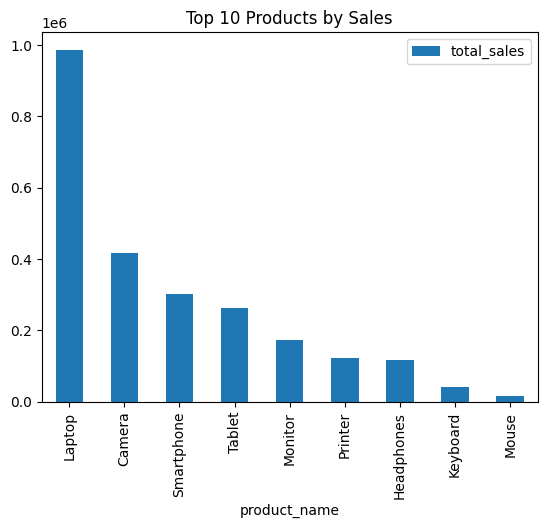

In [ ]:
top10_products.plot(kind='bar', x='product_name', y='total_sales', title='Top 10 Products by Sales')
plt.savefig('Top 10 Products by Sales', format='png')
plt.show()

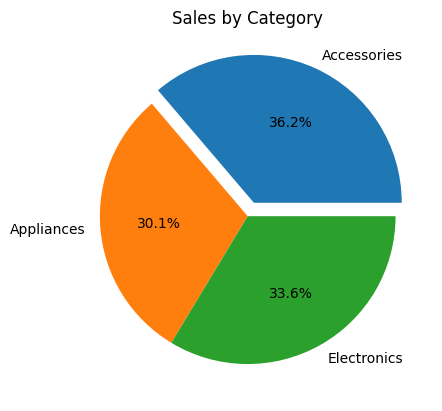

In [ ]:
sales_by_category = df.groupby('category')['total_sales'].sum()
sales_by_category.plot(kind='pie', x='category', y='total_sales', title='Sales by Category', autopct='%1.1f%%', explode=(0.1, 0, 0), legend=False)
plt.ylabel('')
plt.savefig('Sales by Category', format='png')
plt.show()

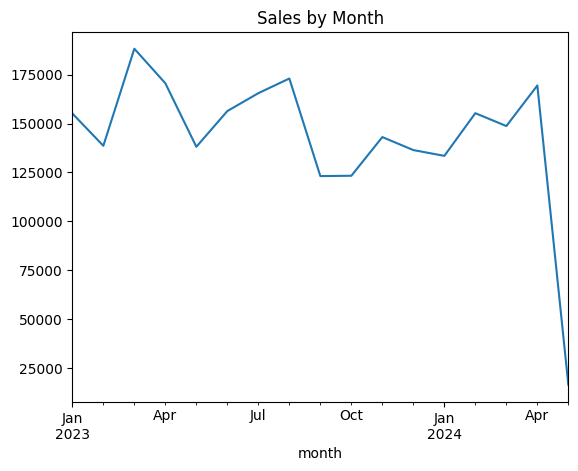

In [ ]:
sales_by_month = df.groupby('month')['total_sales'].sum()
sales_by_month.plot(kind='line', title='Sales by Month')
plt.savefig('Sales by Month', format='png')
plt.show()

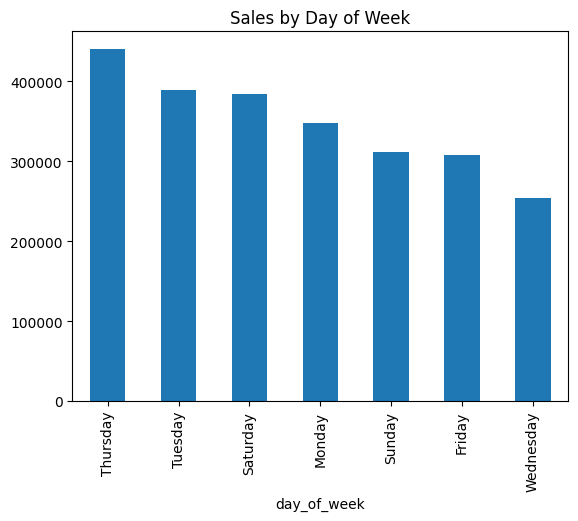

In [ ]:
sales_by_day = df.groupby('day_of_week')['total_sales'].sum().sort_values(ascending=False)
sales_by_day.plot(kind='bar', title='Sales by Day of Week')
plt.savefig('Sales by Day of Week', format='png')
plt.show()

In [ ]:
corr = df['price'].corr(df['quantity'])
corr

0.03904283308125259

In [ ]:
# Wartość 0.039 wskazuje na bardzo słabą dodatnią korelację między price a quantity.
# Wynik ten jest tak niski, że można go interpretować jako brak istotnej liniowej zależności między tymi zmiennymi.

In [ ]:
df_processed = df.copy()

df_processed.to_csv('processed_sales_data.csv', index=False)